<a href="https://colab.research.google.com/github/Sophia-vanegasT/An-lisis_Exploratorio_de_Datos/blob/main/Actividad_An%C3%A1lisis_Exploratorio_de_Datos_de_Pel%C3%ADculas_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar gráficos directamente en el cuaderno
%matplotlib inline

# Cargar dataset
df = pd.read_csv('movie_metadata.csv')


# **Paso 1: Exploración Inicial**
En este primer paso se realiza la carga del archivo **movie_metadata.csv** para comenzar a explorar el dataset. Se visualizan las primeras 5 filas con **.head()** para obtener una idea general del contenido y estructura del dataset. Luego, se utiliza **.info()** y **.describe()** para conocer el tipo de datos, posibles valores nulos, y estadísticas descriptivas como media, desviación estándar, máximos y mínimos.

In [7]:
# Mostrar las primeras 5 filas
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [8]:
# Info del dataset
df.info()

# Estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


#  **Paso 2: Limpieza y Tratamiento de Nulos**
En esta sección se enfoca en la limpieza de los datos, especialmente en el tratamiento de valores nulos o faltantes. Nos centramos en la columna **duration**, verificando cuántos valores faltan y reemplazándolos con la mediana. También se calcula la duración promedio de las películas. Esto asegura que el análisis posterior se base en datos consistentes y completos.

In [9]:
# 2.1 Valores faltantes en (duration)
missing_duration = df['duration'].isna().sum()
print(f"Valores faltantes en 'duration': {missing_duration}")

Valores faltantes en 'duration': 15


In [21]:
# 2.2 Reemplazar NaN por mediana
mediana_duration = df['duration'].median()
df['duration'] = df['duration'].fillna(mediana_duration)
print(f"Mediana usada para reemplazar: {mediana_duration}")

Mediana usada para reemplazar: 103.0


In [11]:
# 2.3 Duración promedio (redondeado a dos decimales)
promedio_duration = round(df['duration'].mean(), 2)
print(f"Duración promedio: {promedio_duration} minutos")

Duración promedio: 107.19 minutos


# **Paso 3: Análisis Específico**
Aquí se realiza un análisis más detallado. Se cuenta cuántas películas se estrenaron en el año 2008 y tienen una duración entre 90 y 120 minutos (inclusive), una duración estándar para largometrajes. Además, se obtiene la mediana de la columna **budget** (presupuesto), convirtiendo los valores a enteros para facilitar su interpretación.



In [12]:
# 3.1 Películas lanzadas en 2008 y con duración entre 90 y 120 minutos
peliculas_2008 = df[(df['title_year'] == 2008) & (df['duration'].between(90, 120))]
print(f"Número de películas lanzadas en 2008 con duración entre 90 y 120 min: {len(peliculas_2008)}")


Número de películas lanzadas en 2008 con duración entre 90 y 120 min: 160


In [14]:
# 3.2 Mediana de presupuesto (budget)
df['budget'] = df['budget'].str.replace('$', '', regex=False)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

mediana_budget = int(df['budget'].median())
print(f"Mediana del presupuesto: ${mediana_budget}")


Mediana del presupuesto: $15000000


#  **4. Reto**
En esta sección se incluyen análisis más profundos como:

Un gráfico de dispersión que muestra la relación entre el presupuesto y la duración de las películas.

El conteo de directores con mayor cantidad de películas en el dataset.

Un análisis de valores atípicos (outliers) en la duración de las películas, con el objetivo de detectar películas anormalmente cortas o largas.

Este tipo de análisis permite descubrir patrones relevantes y evaluar la calidad de los datos antes de usarlos en modelos predictivos o visualizaciones más complejas.

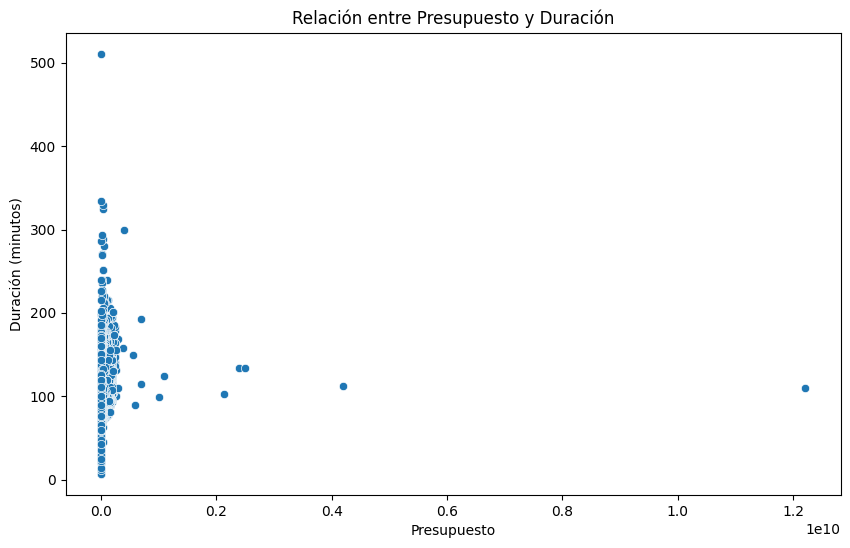

In [15]:
# 4.1 Relación entre presupuesto y duración (Gráfico de dispersión)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='duration', data=df)
plt.title("Relación entre Presupuesto y Duración")
plt.xlabel("Presupuesto")
plt.ylabel("Duración (minutos)")
plt.show()

In [16]:
# 4.2 Directores con más películas
directores_top = df['director_name'].value_counts().head(10)
print("Top 10 directores con más películas:")
print(directores_top)

Top 10 directores con más películas:
director_name
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Tim Burton           16
Spike Lee            16
Steven Soderbergh    16
Renny Harlin         15
Oliver Stone         14
Name: count, dtype: int64


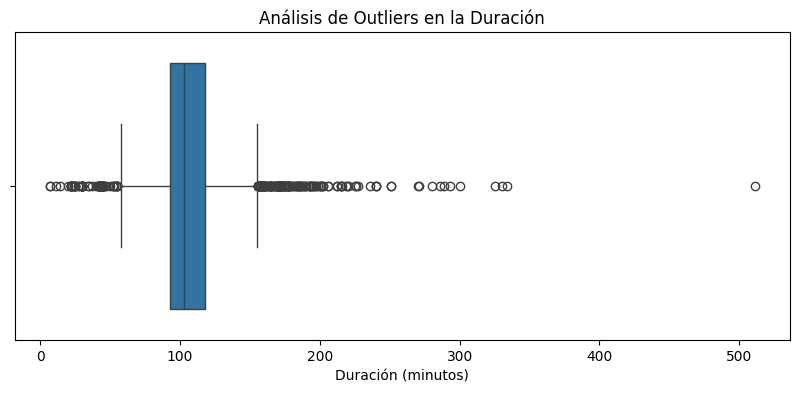

Número de películas con duración atípica: 241


In [17]:
# 4.3 Detección de outliers en duración
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['duration'])
plt.title("Análisis de Outliers en la Duración")
plt.xlabel("Duración (minutos)")
plt.show()

# Detectar valores extremos
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = df[(df['duration'] < limite_inferior) | (df['duration'] > limite_superior)]
print(f"Número de películas con duración atípica: {len(outliers)}")